# Text mining  - Concordencier 

Author: Shannon Brudererg

This notebook provides functions to create a concordancer tool, as well as functions for automatically generating PDF and Excel files for specified terms. It is designed to assist social science researchers in investigating specific terms within textual corpora.

Purpose
This notebook was developed to support the Fablight LARHRA project, which aims to facilitate discussions around the significance of certain terms (such as "light," "bright," "white," "shadows," and "lamp types") within various corpora. The project, which is still ongoing, investigates L’éclairage dans les arts visuels au XVIIIème siècle (Lighting in Visual Arts in the 18th Century).

For more details, see the project page: Fablight LARHRA [https://fablight.hypotheses.org]


### READ ME : Text Analysis Workflow: 

1. **Import the Text:**
   - Load the text into a variable, conventionally named `data.txt`.

2. **Create the Concordancer:**
   - Utilize the concordancer function to identify and display occurrences of specific terms within a context window in the text.

3. **Preliminary Work :**
   - Identify prominent terms, phrases, or patterns in the text. Discuss a series of terms that are interesting to investigate in your research. These can also include names, gender-related terms (madame | monsieur | femmes | fille | homme | garçons), as well as objects (peinture | gravure, etc.). Be creative. This exploratory phase helps in becoming familiar with the text's content and potential areas of interest.

4. **Vocabulary List Compilation:**
   - Collaborate with your team to compile a list of interesting or relevant vocabulary based on the preliminary work results. This list should contain terms that you aim to explore further in the text and historical context. 

5. **Generate and Share Outputs:**
   - Execute the concordancer using the compiled vocabulary list to generate detailed outputs showcasing the usage of each term within its context in the text.
   - Organize the outputs in a manner that facilitates easy review and analysis.

6. **Collaborative Discussion:**
   - Share the outputs with your or partners.
   - Engage in discussions to analyze the importance and relevance of the identified terms, using the concordance results as a basis for informed conversations.

### Tips:
- Make sure that the steps are followed, ensuring that the data is correctly processed and analyzed.
- Encourage collaborative discussion and input from team members to have various perspectives and insights on the textual data.

In [26]:
# Import texte : 
text = ""
f = open("data.txt", "r", encoding='utf8')

for line in f.readlines():
    text = text + " " + line.rstrip("\n")

In [27]:
# Import check : 
print(len(text))

482073


The code below :

- A function named concord is defined, which takes text and a pattern as inputs.
- The re.compile(pat) compiles the regular expression pattern.
- The function searches the text for all occurrences of this pattern and stores their positions.
- For each occurrence of the pattern in the text, it gets a window of text before and after the pattern.
- Three columns in DataFrames are created: one for the left context, one for the matched pattern, and one for the right context.
- The resulting DataFrame, containing all concordance lines, is returned by the function.

In [50]:
# Construction of Concordancer:

import pandas as pd
import re  

window = 50  # Setting the context window to a size that shows X characters before and after the match. Adjust this number according to your need for contextualizing the word.

def concord(text, pat):
    pattern = re.compile(pat)  # Compiling the regex pattern
    res = pattern.finditer(text)  # Finding all occurrences of the pattern in the text
    pos_pattern = [m.span() for m in res]  # Getting the positions (start, end) of each match
    
    # Extracting the left context, the matched term, and the right context, and storing them in DataFrames
    context_left = pd.DataFrame([text[i-window:i-1] for (i, j) in pos_pattern])
    center = pd.DataFrame([text[i: j] for (i, j) in pos_pattern])
    context_right = pd.DataFrame([text[j:j+window] for (i, j) in pos_pattern])
    
    # Concatenating the left context, matched term, and right context horizontally in a single DataFrame
    return (pd.concat([context_left, center, context_right], axis=1))


The code below : 

A concordance is created for the term "lumière," and it’s stored in concord_light.
The concordance is converted into a DataFrame.

The DataFrame is then saved to a CSV file named "concord_light.csv".
Finally, the concordance DataFrame is displayed.

In [51]:
# Example on how to use it for the term "lumière.s":
concord_light = concord(text, r"lumière|lumière/s")

# Save the concordancer in csv format:
concord_light = pd.DataFrame(concord_light)
concord_light.to_csv("concord_light.csv", index=False)
concord_light

,0,0,0
0,"Les bougies de cire, les chandelles, et des l...",lumière,", Depuis, cet art si important a fait des pr..."
1,"ues, et de remplacer les réflecteurs par un sy...",lumière,", bornés, pendant un grand nombre de siècles, ..."
2,rand nombre d'expériences nouvelles qui ont eu...,lumière,. » CHAPITRE I. « CONSIDÉRATIONS GÉNÉRALES SU...
3,"rens appareils d'éclairage, et sous le rapport...",lumière,"sont nombreux et d'une très-haute importance,..."
4,nombreuses applications aux arts. Ici nous ne ...,lumière,qui se rattachent à l'objet que nous avons en...
...,...,...,...
346,ombinaison de phosphore et de soufre qui en se...,lumière,consiste à plonger dans l'acide sulfurique co...
347,un peu plus élevé que l'extrémité supérieure ...,lumière,"; c'est à l'expérience à décider. ERRATUM, ..."
348,"etite hauteur du liquide, qu'est due l'ascensi...",lumière,. Lumière directe. Lumière réfléchie. ...
349,scentes. TABLE DES MATIÈRES. Page...,lumière,. CHAP. II. Différentes sources de la lum...


The code below :

Defines a function to clean regular expressions.
Defines another function that automatically creates concordances, saves them in separate sheets in an Excel file, and creates PDF visual representations.

In [43]:
import pandas as pd

# Function to clean regex patterns by removing "/b" so the outputs can be saved based on the words:
def clean_for_saving(regex_pattern):
    return regex_pattern.strip("\\b")

def auto_concord(text, list_word_concord):
    concord_results = {}
    
    # Creating an excel file:
    excel_writer = pd.ExcelWriter('file_name.xlsx')
    
    for word in list_word_concord:
        a = concord(text, word)
        concord_results[word] = a  

         # If no concordance is created due to absence of the term in the text => 'a' is empty
        if a.empty:
            # Clean up \b for display only
            clean_word_from_regex = word.replace(r'\b', '')
            print(f"No result for the term: { clean_word_from_regex } it is not present in the text")
            continue
        
        # Extracting the word for saving Filename:
        actual_word = clean_for_saving(word)

        # Saving the dfs in separate sheets in Excel:   
        a.to_excel(excel_writer, sheet_name = actual_word)

        # Saving the sheets in PDF
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(14,4))
        ax.axis('tight')
        ax.axis('off') # hide axes 
        the_table = ax.table(cellText=a.values, colLabels=a.columns, cellLoc='center', rowLoc='center', loc='center')
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(9)
        plt.savefig(f"/Users/shannonbruderer/myenv/myenv/Lexique Fablight/file_name_{actual_word}.pdf")
        
    # Closing and Saving the Excel file
    excel_writer.close()

    return concord_results


The code below :

Initializes a vocabulary list with specific words.
Converts each word in the vocabulary list into a regular expression, enabling a more efficient and precise text search.
Prints the new list of regular expressions.

In [44]:
# Vocabulary List:
list_voc = ["blanc", "blancs", "blanche", "blanches", "brillant", "brillants", "briller", "clair"]

# Convert the list into a regular expression to better search through the text:
regex_list_voc = [rf"\b{mot}\b" for mot in list_voc]

# Printing the new regex list
print(regex_list_voc)


['\\bblanc\\b', '\\bblancs\\b', '\\bblanche\\b', '\\bblanches\\b', '\\bbrillant\\b', '\\bbrillants\\b', '\\bbriller\\b', '\\bclair\\b']


The code below :

Generates PDF and Excel outputs for further analysis and to facilitate discussion groups.
It checks whether the length of the controlled vocabulary list is equal to the length of the concordance dictionary, ensuring that every word has been processed. If the lengths match, it prints that everything is in order; otherwise, it indicates that there may be an error in the function or list.

The controlled vocabulary list contains 8 words


No result for the term: brillants it is not present in the text
No result for the term: briller it is not present in the text
No result for the term: clair it is not present in the text


The concordance dictionary contains 8 concordances 
 It is of type: <class 'dict'>


Everything is in order


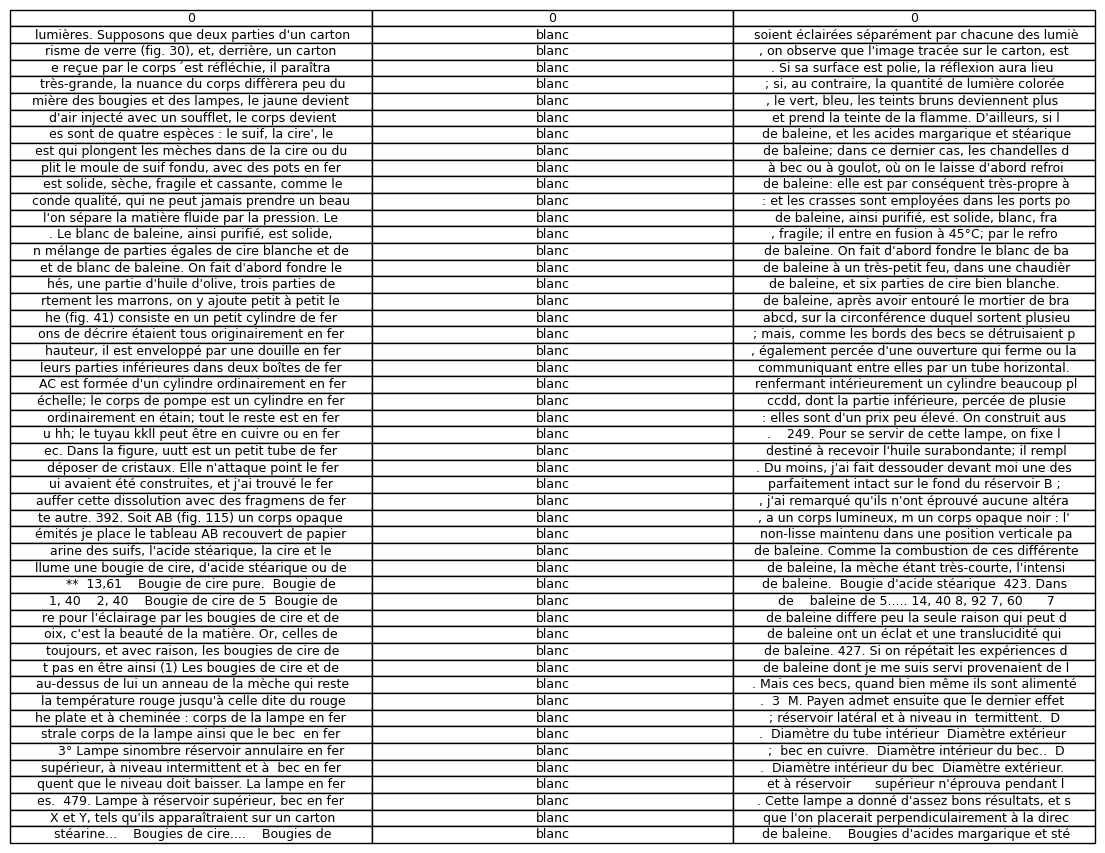

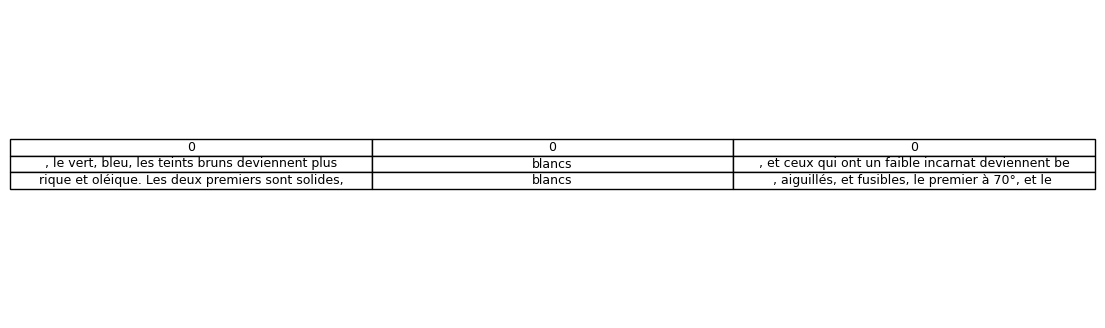

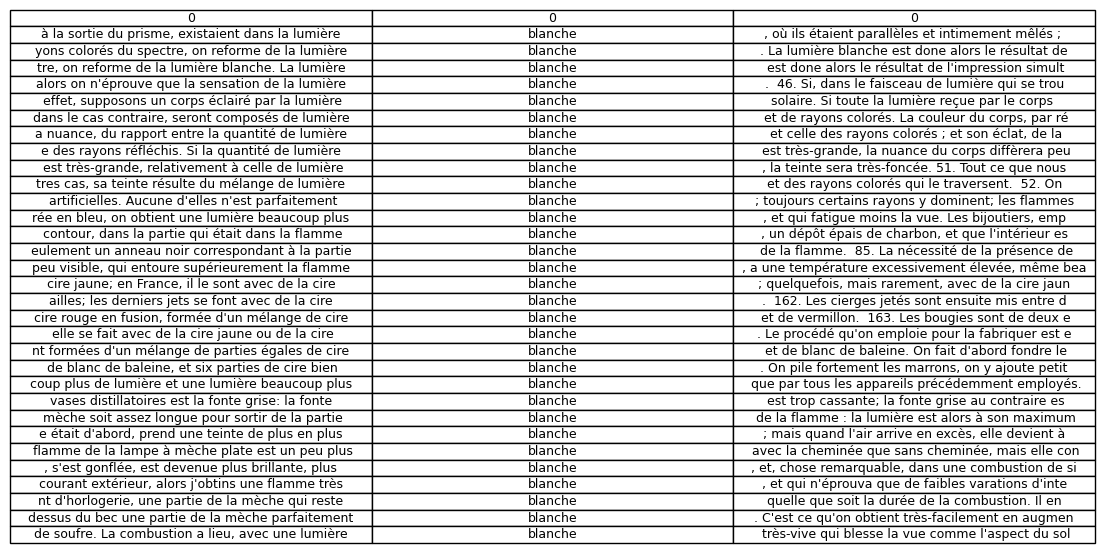

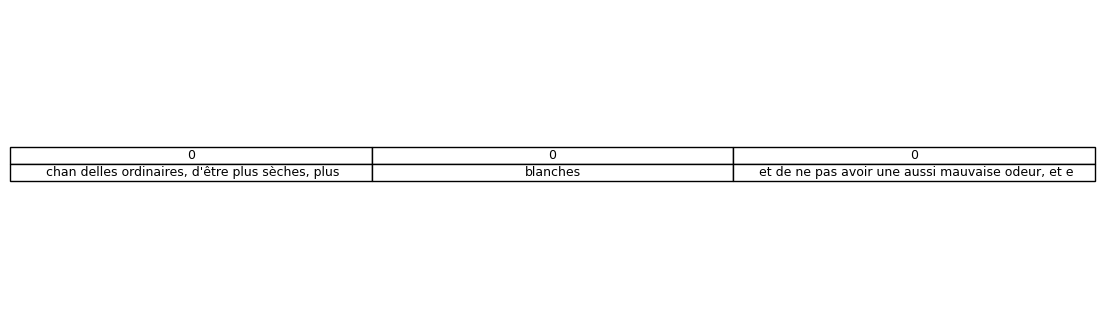

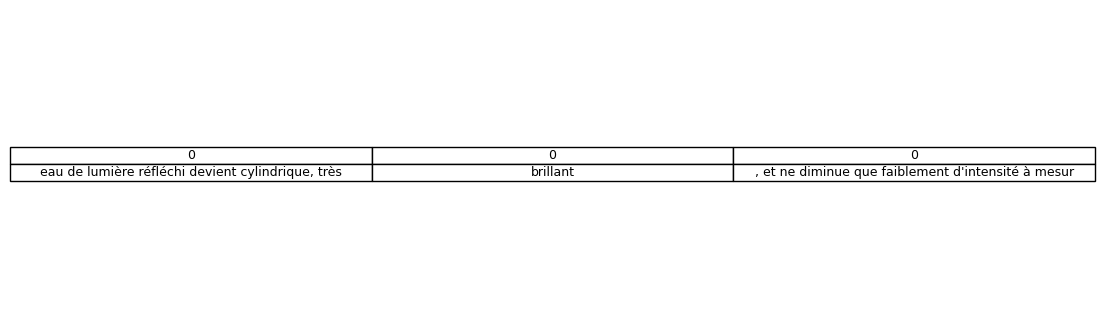

In [45]:
# Generate PDF and Excel Output for deeper analyses and to animate discussion groups:

liste_voc_concord = regex_list_voc
print("The controlled vocabulary list contains", len(liste_voc_concord), "words")

print("\n")

dict_concord = auto_concord(text, liste_voc_concord)
print("\n")

print("The concordance dictionary contains", len(dict_concord), "concordances",
      "\n", "It is of type:", type(dict_concord))

print("\n")

if len(liste_voc_concord) == len(dict_concord):
    print("Everything is in order")
else:
    print(" Error in function or list")